# Data Analysis

## **Question 4**
How do the profiles and performance differ between single-listing hosts and multi-listing hosts (calculated_host_listings_count)? Do professional hosts tend to dominate certain neighborhoods, set different prices, or garner more reviews compared to individual hosts?
* * *

**Why is this important?**

Understanding the host ecosystem is vital for Airbnb. If the market relies too heavily on a few large hosts, it poses a risk. This insight can help Airbnb design different support programs for different host segments (e.g., training for new hosts vs. management tools for professional hosts).

	•	The Airbnb market can be dominated by professional hosts (multi-property owners).
	•	This affects competition: can small hosts still remain competitive?
	•	Such information is crucial for regulatory policy, corporate strategy, and ensuring fairness in the marketplace.

### --- 1)  Create a host category: Single vs Multi


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import warnings

path = "Airbnb Bangkok Listings (clean).csv"
df = pd.read_csv(path, parse_dates=["last_review"])

# Using 'calculated_host_listings_count' from the dictionary
df["host_category"] = np.where(df["calculated_host_listings_count"] == 1, "Single", "Multi")

# Check distribution of hosts
print("\nHost Category Distribution (%):")
print(df["host_category"].value_counts(normalize=True) * 100)

# ------------------------------------------------------


Host Category Distribution (%):
host_category
Multi     70.947395
Single    29.052605
Name: proportion, dtype: float64


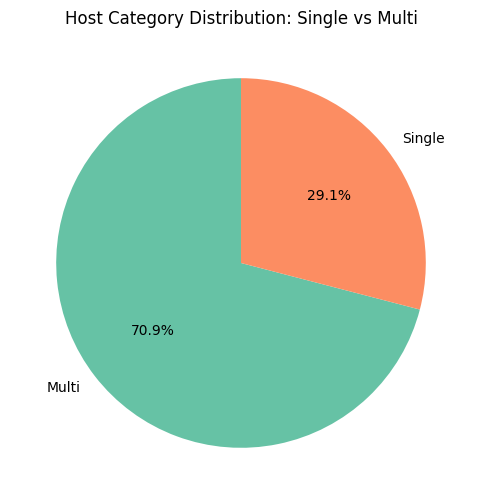

In [ ]:
import matplotlib.pyplot as plt

# Distribution data
host_dist = df["host_category"].value_counts(normalize=True) * 100

# --- Pie Chart ---
plt.figure(figsize=(6,6))
plt.pie(host_dist, labels=host_dist.index, autopct="%.1f%%", startangle=90, colors=["#66c2a5", "#fc8d62"])
plt.title("Host Category Distribution: Single vs Multi")
plt.show()

The Bangkok Airbnb market is dominated by multi-property hosts (71%), while single-property hosts account for only about 29%.


### --- 2) Descriptive Comparison (Price, Reviews, Availability)

In [ ]:
summary = df.groupby("host_category")[["price", "number_of_reviews", "availability_365"]].agg(
    ["mean", "median", "std", "count"]
)
print("\nPerformance Summary (Single vs Multi Hosts):")
display(summary)


Performance Summary (Single vs Multi Hosts):


price                             number_of_reviews  \
                      mean  median          std  count              mean   
host_category                                                              
Multi          2010.310188  1456.5  1662.229915  11248         19.286184   
Single         1929.766826  1350.0  1614.399972   4606         10.226661   

                                       availability_365                     \
              median        std  count             mean median         std   
host_category                                                                
Multi            3.0  43.029685  11248       246.418119  315.0  125.474198   
Single           0.0  33.135072   4606       239.398176  282.0  126.615543   

                      
               count  
host_category         
Multi          11248  
Single          4606

### --- 3) Visualization: Boxplots


/tmp/ipython-input-513012744.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="host_category", y="price", data=df, showfliers=False, ax=axes[0], palette="Set2")
/tmp/ipython-input-513012744.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="host_category", y="number_of_reviews", data=df, showfliers=False, ax=axes[1], palette="Set2")
/tmp/ipython-input-513012744.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="host_category", y="availability_365", data=df, showfliers=False, ax=axes[2], palette="Set2")


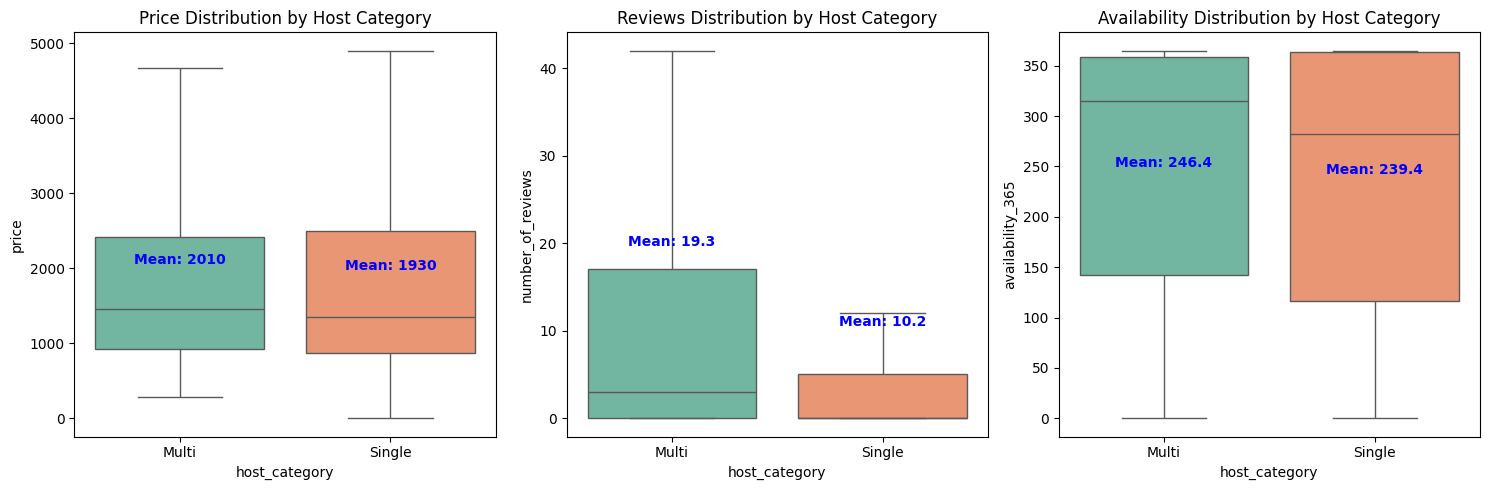

In [ ]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15,5))

# --- Price ---
sns.boxplot(x="host_category", y="price", data=df, showfliers=False, ax=axes[0], palette="Set2")
axes[0].set_title("Price Distribution by Host Category")

# Add mean annotations
means_price = df.groupby("host_category")["price"].mean()
for i, (cat, mean_val) in enumerate(means_price.items()):
    axes[0].text(i, mean_val, f"Mean: {mean_val:.0f}",
                 ha='center', va='bottom', color="blue", fontsize=10, fontweight="bold")

# --- Reviews ---
sns.boxplot(x="host_category", y="number_of_reviews", data=df, showfliers=False, ax=axes[1], palette="Set2")
axes[1].set_title("Reviews Distribution by Host Category")

means_reviews = df.groupby("host_category")["number_of_reviews"].mean()
for i, (cat, mean_val) in enumerate(means_reviews.items()):
    axes[1].text(i, mean_val, f"Mean: {mean_val:.1f}",
                 ha='center', va='bottom', color="blue", fontsize=10, fontweight="bold")

# --- Availability ---
sns.boxplot(x="host_category", y="availability_365", data=df, showfliers=False, ax=axes[2], palette="Set2")
axes[2].set_title("Availability Distribution by Host Category")

means_avail = df.groupby("host_category")["availability_365"].mean()
for i, (cat, mean_val) in enumerate(means_avail.items()):
    axes[2].text(i, mean_val, f"Mean: {mean_val:.1f}",
                 ha='center', va='bottom', color="blue", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

Multi-property hosts dominate the Bangkok Airbnb market with higher prices, more reviews, and slightly greater availability. Single-property hosts may face challenges in competing, which has implications for fairness, competition, and regulatory policies.

### --- 4) Statistical Tests

In [ ]:
# T-test: Price difference
t_price, p_price = stats.ttest_ind(
    df[df["host_category"]=="Single"]["price"],
    df[df["host_category"]=="Multi"]["price"],
    equal_var=False
)

# T-test: Reviews difference
t_reviews, p_reviews = stats.ttest_ind(
    df[df["host_category"]=="Single"]["number_of_reviews"],
    df[df["host_category"]=="Multi"]["number_of_reviews"],
    equal_var=False
)

# T-test: Availability difference
t_avail, p_avail = stats.ttest_ind(
    df[df["host_category"]=="Single"]["availability_365"],
    df[df["host_category"]=="Multi"]["availability_365"],
    equal_var=False
)

print("\nStatistical Test Results (Single vs Multi Hosts):")
print(f"Price: t={t_price:.2f}, p={p_price:.4f}")
print(f"Reviews: t={t_reviews:.2f}, p={p_reviews:.4f}")
print(f"Availability: t={t_avail:.2f}, p={p_avail:.4f}")


Statistical Test Results (Single vs Multi Hosts):
Price: t=-2.83, p=0.0047
Reviews: t=-14.27, p=0.0000
Availability: t=-3.18, p=0.0015




```
	•	Multi-property hosts (professional hosts) charge slightly higher prices,
	•	but they also receive significantly more reviews (indicating higher demand & engagement),
	•	and maintain higher availability compared to single-property hosts.
```



### --- 5) Neighborhood Concentration (Chi-Square Test)

In [ ]:
# Debug: check which columns exist
print(df.columns.tolist())

# If there is a typo 'neighbourhood', fix it
if "neighbourhood" in df.columns:
    df = df.rename(columns={"neighbourhood": "neighborhood"})

# Make sure host_category exists
if "host_category" not in df.columns:
    df["host_category"] = np.where(df["calculated_host_listings_count"] == 1,
                                   "Single", "Multi")

# Run Chi-square test between neighborhood and host category
ct = pd.crosstab(df["neighborhood"], df["host_category"])
chi2, p, dof, ex = stats.chi2_contingency(ct)

print("\nChi-Square Test: Neighborhood vs Host Category")
print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")

# Find top 10 neighborhoods where Multi hosts dominate
multi_dom = (ct.apply(lambda x: x/x.sum(), axis=1)["Multi"]) \
              .sort_values(ascending=False).head(10)

print("\nTop Neighborhoods Dominated by Multi Hosts:")
display(multi_dom)

['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'has_review', 'price_before', 'price_after', 'occupancy_rate', 'days_since_last_review', 'host_tier', 'host_category']

Chi-Square Test: Neighborhood vs Host Category
Chi2 = 1217.66, p = 0.0000

Top Neighborhoods Dominated by Multi Hosts:


,Multi
neighborhood,
Phra Nakhon,0.873990
Pom Prap Sattru Phai,0.861789
Samphanthawong,0.850877
Ratchathewi,0.844704
Sathon,0.840544
Bang Rak,0.807739
Khlong Toei,0.803529
Parthum Wan,0.767033
Huai Khwang,0.738667


### --- 6) summary

Statistics for Single-Listing Hosts:
             price  availability_365  minimum_nights
count  4606.000000       4606.000000     4606.000000
mean   1929.766826        239.398176       20.251194
std    1614.399972        126.615543       58.793786
min       0.000000          0.000000        1.000000
25%     870.000000        116.250000        1.000000
50%    1350.000000        282.000000        2.000000
75%    2500.000000        364.000000       14.000000
max    7016.000000        365.000000     1095.000000


Statistics for Multi-Listing Hosts:
              price  availability_365  minimum_nights
count  11248.000000      11248.000000    11248.000000
mean    2010.310188        246.418119       13.261735
std     1662.229915        125.474198       47.011983
min      278.000000          0.000000        1.000000
25%      920.000000        142.000000        1.000000
50%     1456.500000        315.000000        1.000000
75%     2419.500000        359.000000        5.000000
max     7016.000

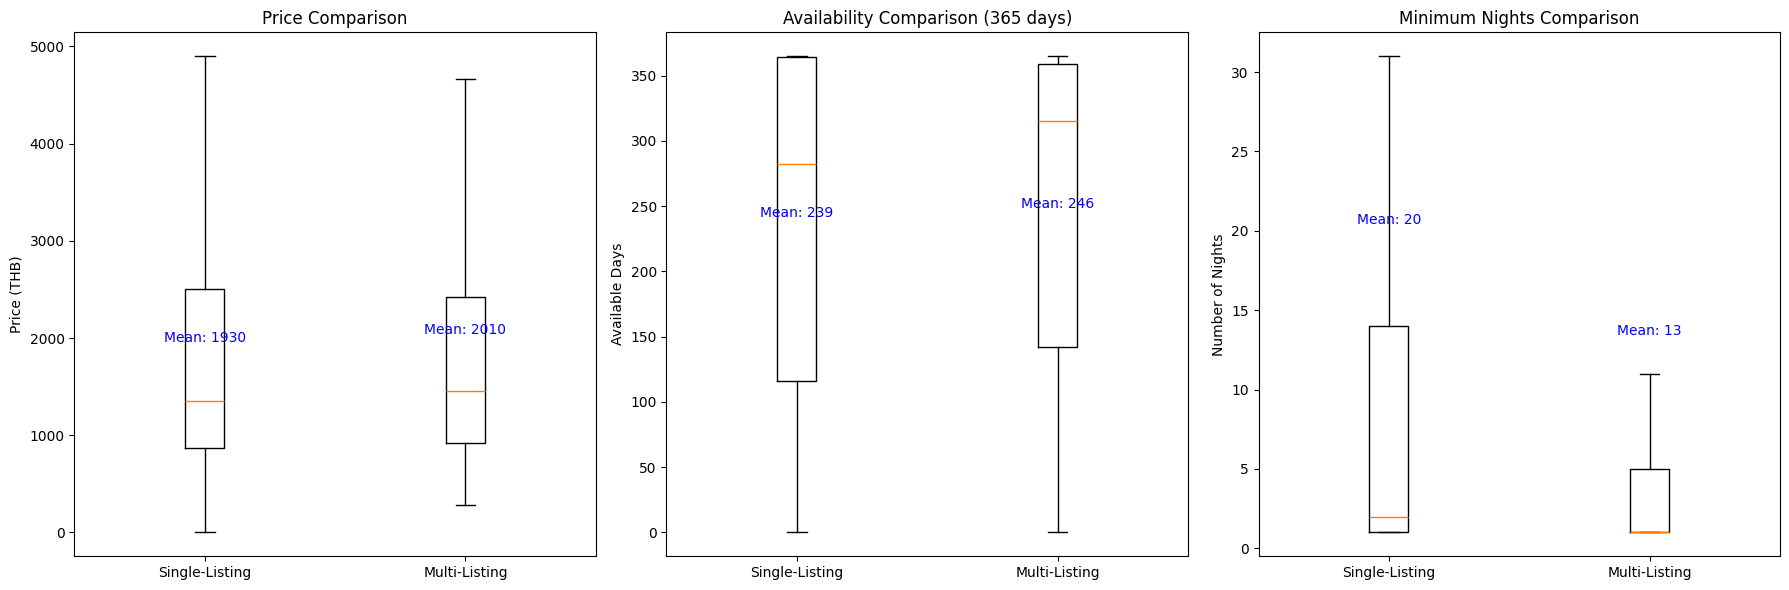

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

path = "Airbnb Bangkok Listings (clean).csv"
df = pd.read_csv(path, parse_dates=["last_review"])

# 2. Host Segmentation
single_listing_hosts = df[df['calculated_host_listings_count'] == 1]
multi_listing_hosts = df[df['calculated_host_listings_count'] > 1]

# 3. Descriptive Statistics Analysis
print("Statistics for Single-Listing Hosts:")
print(single_listing_hosts[['price', 'availability_365', 'minimum_nights']].describe())
print("\n" + "="*50 + "\n")
print("Statistics for Multi-Listing Hosts:")
print(multi_listing_hosts[['price', 'availability_365', 'minimum_nights']].describe())

# 4. Visualization with averages shown
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Box plot for Price ---
data_price = [single_listing_hosts['price'], multi_listing_hosts['price']]
axes[0].boxplot(data_price, showfliers=False)
axes[0].set_title('Price Comparison')
axes[0].set_xticklabels(['Single-Listing', 'Multi-Listing'])
axes[0].set_ylabel('Price (THB)')

# Add averages
for i, group in enumerate(data_price, start=1):
    mean_val = np.mean(group)
    axes[0].text(i, mean_val, f"Mean: {mean_val:.0f}", ha='center', va='bottom', fontsize=10, color="blue")

# --- Box plot for Availability ---
data_avail = [single_listing_hosts['availability_365'], multi_listing_hosts['availability_365']]
axes[1].boxplot(data_avail, showfliers=False)
axes[1].set_title('Availability Comparison (365 days)')
axes[1].set_xticklabels(['Single-Listing', 'Multi-Listing'])
axes[1].set_ylabel('Available Days')

# Add averages
for i, group in enumerate(data_avail, start=1):
    mean_val = np.mean(group)
    axes[1].text(i, mean_val, f"Mean: {mean_val:.0f}", ha='center', va='bottom', fontsize=10, color="blue")

# --- Box plot for Minimum Nights ---
data_min_nights = [single_listing_hosts['minimum_nights'], multi_listing_hosts['minimum_nights']]
axes[2].boxplot(data_min_nights, showfliers=False)
axes[2].set_title('Minimum Nights Comparison')
axes[2].set_xticklabels(['Single-Listing', 'Multi-Listing'])
axes[2].set_ylabel('Number of Nights')

# Add averages
for i, group in enumerate(data_min_nights, start=1):
    mean_val = np.mean(group)
    axes[2].text(i, mean_val, f"Mean: {mean_val:.0f}", ha='center', va='bottom', fontsize=10, color="blue")

plt.tight_layout()
plt.savefig('host_behavior_comparison_with_means.png')

print("\nVisualization with averages has been saved as 'host_behavior_comparison_with_means.png'")